## 1. 필요한 패키지들을 불러옵니다.

In [2]:
import os
BASE_PATH = os.path.dirname(os.getcwd())
os.chdir(BASE_PATH)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model

In [6]:
from utils.helper import images_cropper, glob_all_files, paths2numpy
from utils.helper import find_all_target, find_max_target, draw_rectangles

## 2. 학습 시킨 모델을 불러옵니다

In [7]:
# 모델을 불러옵니다. 
model = load_model('./models/book1_model')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 36, 36, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 36, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 36, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 36, 36, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 64)       

## 3. 모델을 평가용 데이터로 테스트합니다.

In [8]:
# 평가에 사용될 월리 책 번호
book_number = 1

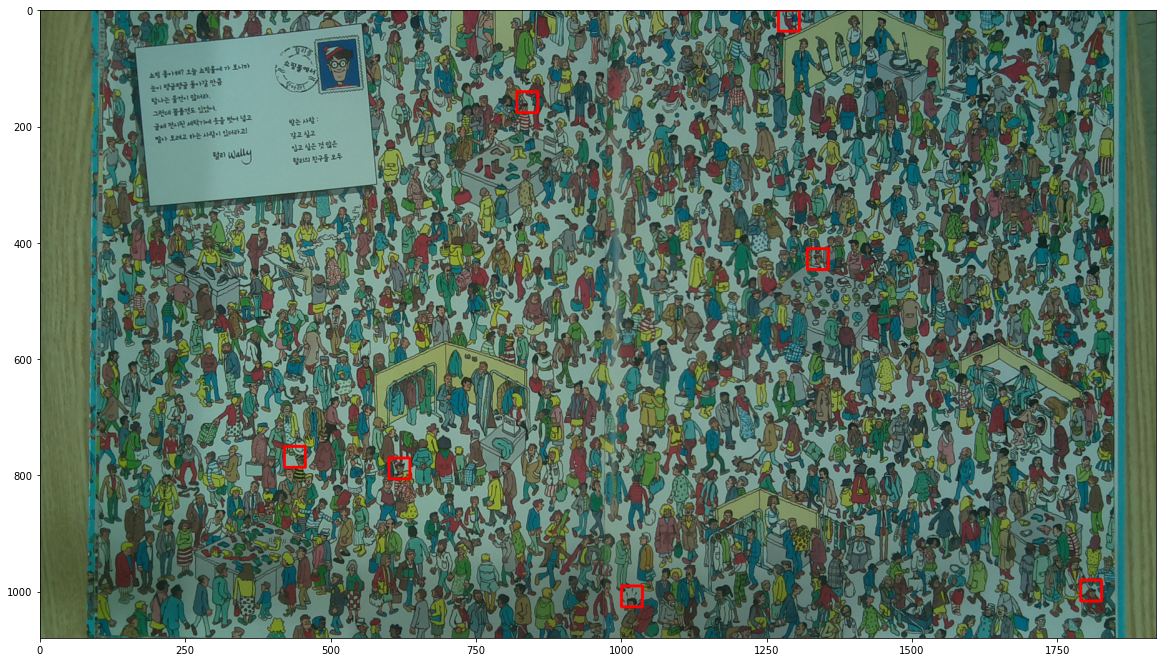

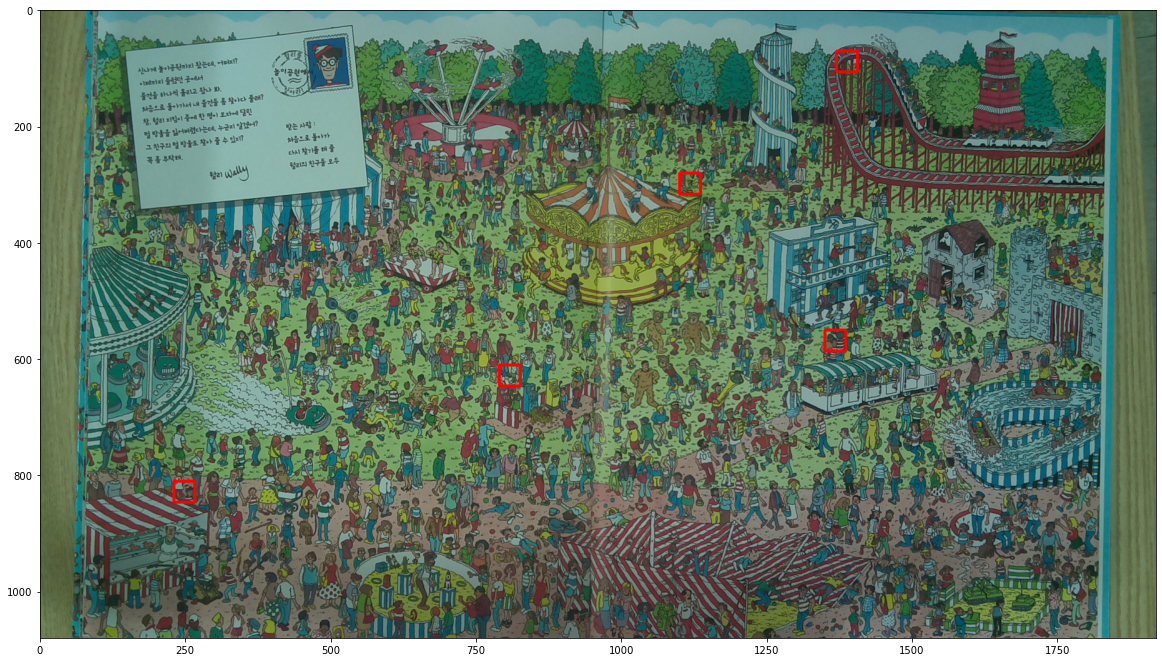

In [10]:
paths = glob_all_files(f"./data/book{str(book_number)}/test_imgs")

imgs = paths2numpy(paths)

assert imgs, print("올바른 경로가 아니거나, 경로 내에 평가용 이미지가 존재하지 않습니다.")

bucket_crop_imgs, bucket_crop_crds = images_cropper(imgs, 10, 10, 36, 36)

for i, img in enumerate(imgs):
    cropped_imgs = bucket_crop_imgs[i]
    cropped_crds = bucket_crop_crds[i]

    # 예측값을 저장한 후, 그 중 0.5가 넘는 값들에 대한 불리언 마스크를 만드는 부분입니다.
    predicts = model.predict(cropped_imgs)

    # mask 를 생성하는 함수들 입니다. 둘 중에서 원하는 방식을 사용할 수 있습니다.
    # find_non_background: 학습 모델이 이미지에서 배경이라고 판단하지 않은 부분의 인덱스들을 가져옵니다.
    #               limit 변수에 0이상 1미만의 값을 넣을 경우, 해당 값을 초과하는 예측값을 가진 부분의 인덱스들만을 가져옵니다.

    # target 부분에 넣는 인자에 따라 특정 캐릭터의 예측 위치를 가져올 수 있습니다.
    # 0: 모든 캐릭터, 1: 월리, 2: 여자친구, 3: 마법사, 4: 가짜
    mask = find_all_target(predicts, limit=0, target=0)

    # show_images(cropped_imgs[bool_mask])    # 불리언 마스크를 적용시킨 결과로 얻은 월리의 얼굴로 추정되는 이미지 조각들을 출력
    target_crds = np.array(cropped_crds)[mask]  # 찾고자 하는 캐릭터의 얼굴이 있을 것으로 예상되는 좌표들을 저장
    predicts = predicts[mask]  # 불리언 마스크를 적용시켰을 때의 예측값을 저장

    # 각 행들의 최대 예측값을 저장
    predicts = np.max(predicts, axis=1)

    # 학습 모델이 목표로 잡은 곳에 빨간 사각형을 그린 후 해당 이미지를 저장한다.
    result_image = draw_rectangles(img, target_crds, (255, 0, 0), 3, predicts)

    # 결과 이미지를 화면에 보여준다
    plt.figure(figsize=(20, 20))
    plt.imshow(result_image)
    plt.show()

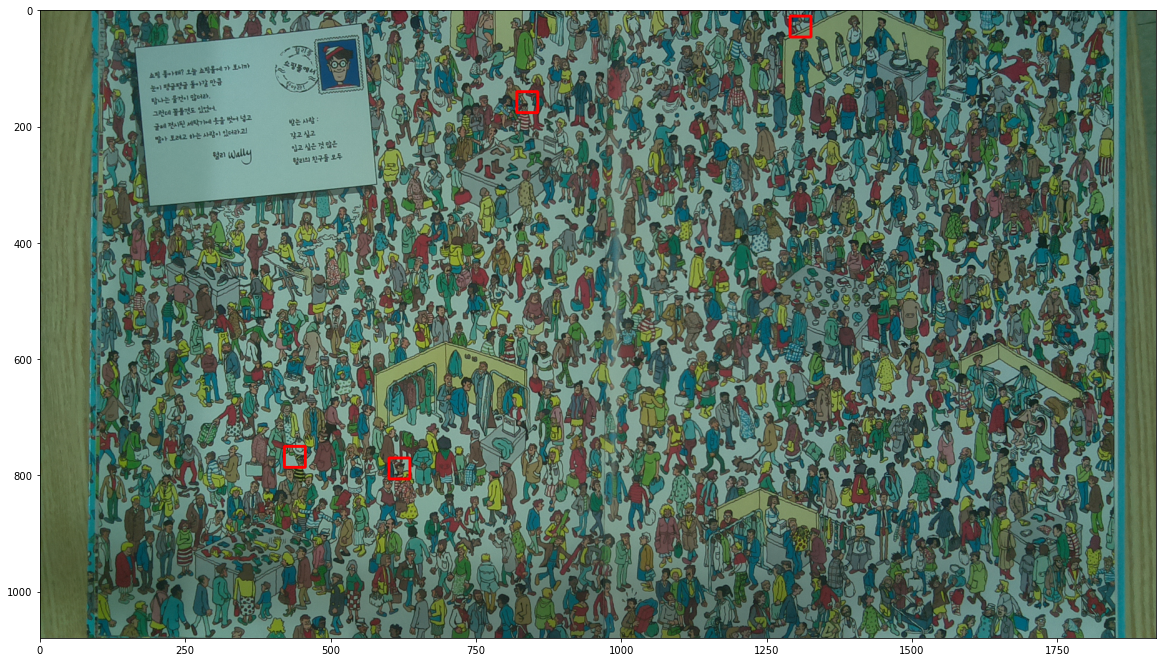

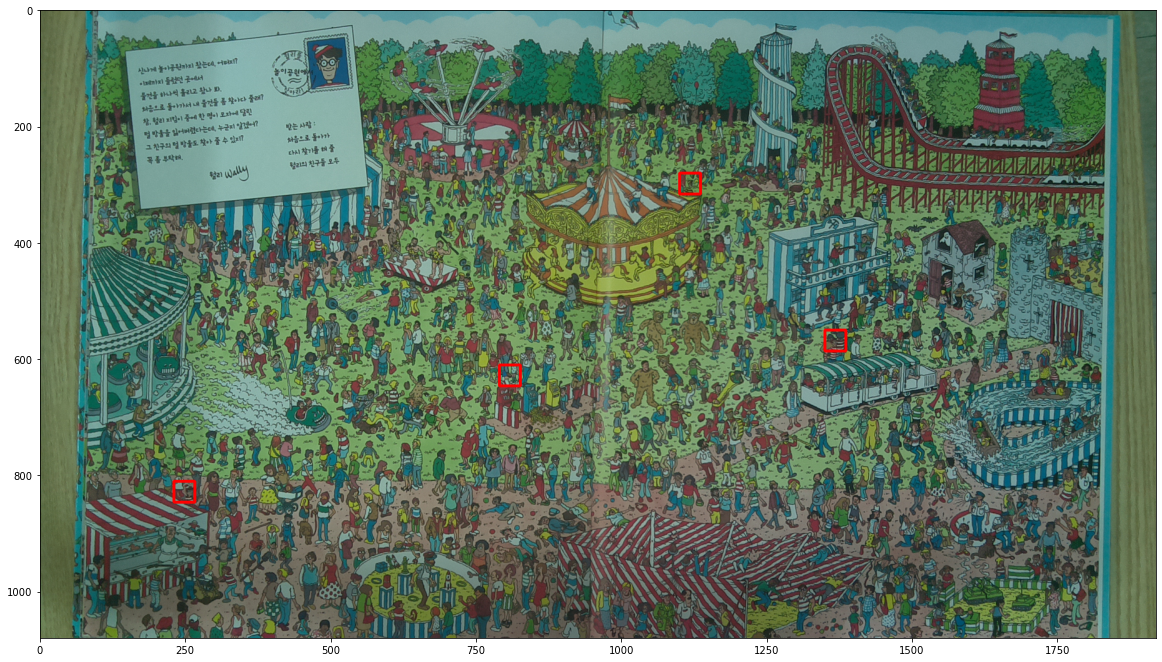

In [12]:
paths = glob_all_files(f"./data/book{str(book_number)}/test_imgs")

imgs = paths2numpy(paths)

assert imgs, print("올바른 경로가 아니거나, 경로 내에 평가용 이미지가 존재하지 않습니다.")

bucket_crop_imgs, bucket_crop_crds = images_cropper(imgs, 10, 10, 36, 36)

for i, img in enumerate(imgs):
    cropped_imgs = bucket_crop_imgs[i]
    cropped_crds = bucket_crop_crds[i]

    # 예측값을 저장한 후, 그 중 0.5가 넘는 값들에 대한 불리언 마스크를 만드는 부분입니다.
    predicts = model.predict(cropped_imgs)

    # mask 를 생성하는 함수들 입니다. 둘 중에서 원하는 방식을 사용할 수 있습니다.
    # find_max_prediction: 학습 모델이 이미지에서 목표 캐릭터의 얼굴일 확률이 가장 높은 부분의 인덱스들을 가져옵니다.

    # target 부분에 넣는 인자에 따라 특정 캐릭터의 예측 위치를 가져올 수 있습니다.
    # 0: 모든 캐릭터, 1: 월리, 2: 여자친구, 3: 마법사, 4: 가짜
    mask = find_max_target(predicts, target=0)

    # show_images(cropped_imgs[bool_mask])    # 불리언 마스크를 적용시킨 결과로 얻은 월리의 얼굴로 추정되는 이미지 조각들을 출력
    target_crds = np.array(cropped_crds)[mask]  # 찾고자 하는 캐릭터의 얼굴이 있을 것으로 예상되는 좌표들을 저장
    predicts = predicts[mask]  # 불리언 마스크를 적용시켰을 때의 예측값을 저장

    # 각 행들의 최대 예측값을 저장
    predicts = np.max(predicts, axis=1)

    # 학습 모델이 목표로 잡은 곳에 빨간 사각형을 그린 후 해당 이미지를 저장한다.
    result_image = draw_rectangles(img, target_crds, (255, 0, 0), 3, predicts)

    # 결과 이미지를 화면에 보여준다
    plt.figure(figsize=(20, 20))
    plt.imshow(result_image)
    plt.show()